In [1]:
import numpy as np
import matplotlib.pyplot as plt
from signals.Signal import SineSignal, CarrierSignal
from transformations.sampling import asymmetrical_sampling

In [2]:
pi = np.pi
simulation_time = 1
time_step = 1e-5
ticks = int(simulation_time/time_step)

simulation_time = time_step * ticks
t = np.linspace(0,simulation_time,ticks)

Text(0.5, 1.0, 'Modulated signal')

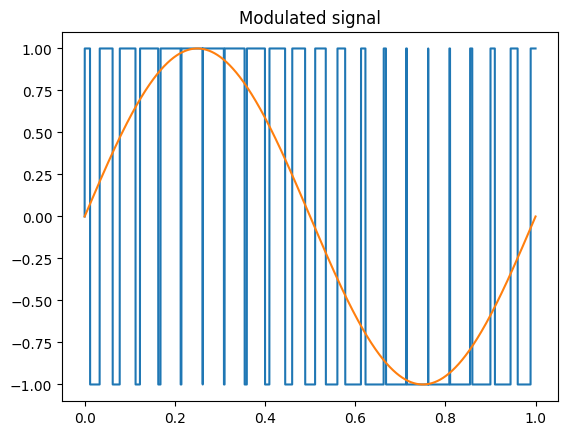

In [3]:
sine = SineSignal(time=t)
carrier = CarrierSignal(frequency=sine.frequency*21,time=t)
modulated,_ = asymmetrical_sampling(carrier,sine)
plt.plot(t,modulated,t,sine.out)
plt.title("Modulated signal")

In [4]:
def rebuild_from_modulated(carrier, modulated):
    modulated_average = []
    carrier_period = carrier.period
    window_length = int(carrier_period/time_step)
    window = []
    acumsum = 0
    for mi in modulated:
        window.append(mi)
        acumsum += mi
        if len(window) == window_length:
            acumsum -= window.pop(0)
        modulated_average.append(acumsum/window_length)
    return modulated_average

def modulate_and_analyze(carrier_frequency, signal_to_modulate, time):
    carrier = CarrierSignal(frequency=carrier_frequency, time=time)
    modulated, _ = asymmetrical_sampling(carrier,signal_to_modulate)
    return rebuild_from_modulated(carrier, modulated)

Text(0.5, 1.0, 'Modulated signal')

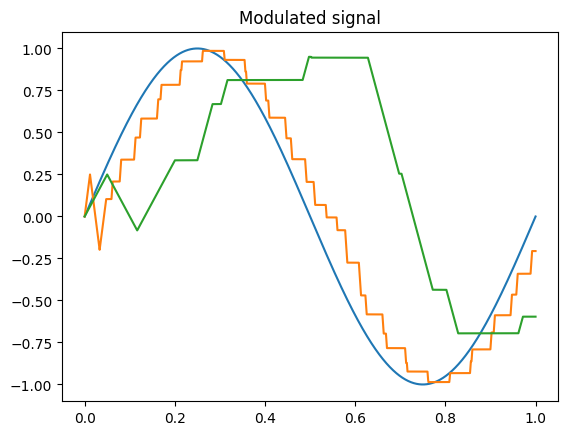

In [5]:
modulated_average_low = modulate_and_analyze(sine.frequency*5, sine, t)
modulated_average = rebuild_from_modulated(carrier, modulated)
plt.plot(t,sine.out,t,modulated_average,t, modulated_average_low)
plt.title("Modulated signal")

Text(0.5, 1.0, 'Modulated signal')

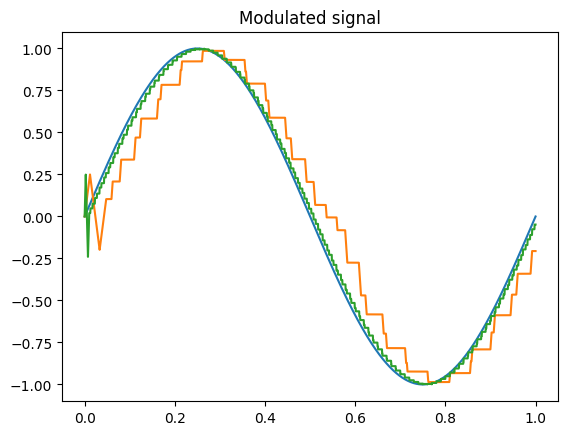

In [6]:
modulated_average_high = modulate_and_analyze(sine.frequency*100, sine, t)
plt.plot(t,sine.out,t,modulated_average,t, modulated_average_high)
plt.title("Modulated signal")

Text(0.5, 1.0, 'Modulated signal')

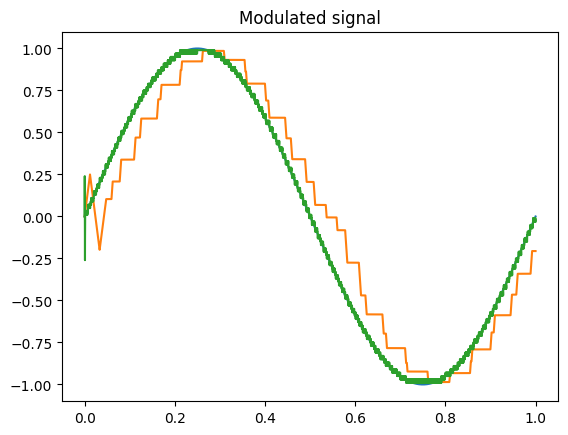

In [7]:
modulated_average_high = modulate_and_analyze(sine.frequency*1000, sine, t)
plt.plot(t,sine.out,t,modulated_average,t, modulated_average_high)
plt.title("Modulated signal")